
# Structural descriptors for the complex netwroks in the CircularEconomy model

## Numerical descriptors

1. Number of nodes
2. Number of edges
3. Minimum, maximum and average degree
4. Average clustering coefficient (average of the clustering coefficients of each node)
5. Assortativity
6. Average path length (average distance between all pairs of nodes)
7. Diameter (maximum distance between nodes in the network)

In [3]:
# Reading the data from the database
## autoreload 
%load_ext autoreload
%autoreload 2

from utils.helpers import reading_data, get_edge_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
## defining the paths: 
PATH = "./data/clean_data.csv"
df = reading_data(PATH)
df.head()


,M-001,M-002,M-003,M-004,M-005,M-006,M-007,M-008,M-009,M-010,M-011,M-012,M-013,M-014,M-015,M-016,M-017,M-018,M-019,M-020
Processes,,,,,,,,,,,,,,,,,,,,
P-001,-73,0,59,0,48,0,0,0,0,0,0,-60,0,0,-26,0,0,-9,-15,0
P-002,0,0,0,0,73,0,0,11,0,69,71,0,36,-33,33,-82,64,0,-38,-92
P-003,0,0,0,58,26,0,0,92,43,0,0,-42,34,-4,5,0,0,0,0,0
P-004,0,71,-28,0,-76,0,4,-12,0,0,-11,0,-21,0,0,-28,0,18,0,0
P-005,0,-2,0,-71,37,0,0,19,16,-43,-9,98,-7,0,0,0,0,-91,22,4


---------DESCRIPTORS FOR THE GRAPH---------
*******************************************
Is the graph directed?           : False
Number of nodes                  : 50
Number of edges                  : 600
Maximum degree                   : ('P-030', 20)
Minimum degree                   : ('M-001', 30)
Diameter                         : 2
Radius                           : 2
Number of connected components   : 1
Number of self loops             : 0
Average path length              : 1.510204081632653

**************************************************************************************
Clustering coefficient           : {'P-001': 0, 'P-002': 0, 'P-003': 0, 'P-004': 0, 'P-005': 0, 'P-006': 0, 'P-007': 0, 'P-008': 0, 'P-009': 0, 'P-010': 0, 'P-011': 0, 'P-012': 0, 'P-013': 0, 'P-014': 0, 'P-015': 0, 'P-016': 0, 'P-017': 0, 'P-018': 0, 'P-019': 0, 'P-020': 0, 'P-021': 0, 'P-022': 0, 'P-023': 0, 'P-024': 0, 'P-025': 0, 'P-026': 0, 'P-027': 0, 'P-028': 0, 'P-029': 0, 'P-030': 0, 'M-001': 0,

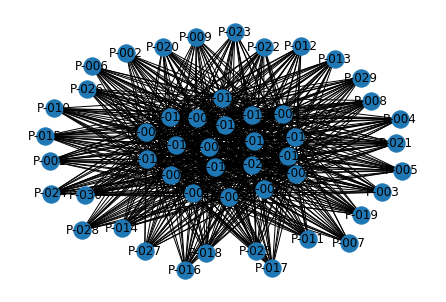

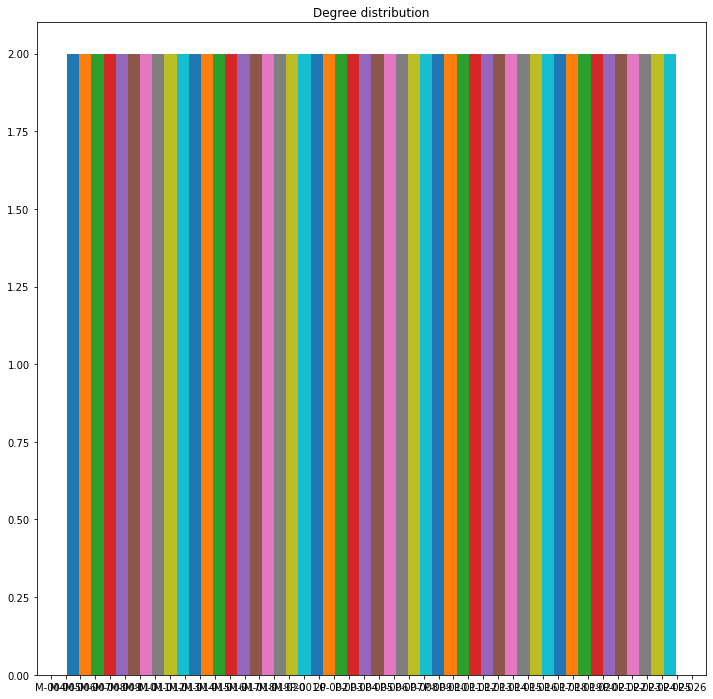

In [39]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import NetworkXError, NetworkXPointlessConcept, NetworkXAlgorithmError
from networkx import multigraph
import pandas as pd
import numpy as np
# Create a graph with the dataframe in networkx 
from networkx import Graph

def constructing_graph(df:pd.DataFrame) -> Graph:
    """Function to create a graph from a dataframe."""
    ## create a graph 
    G = Graph()
    ## add the nodes 
    G.add_nodes_from(df.index)
    G.add_nodes_from(df.columns)
    ## add the edges 
    G.add_edges_from(get_edge_list(df))
    # get some shape from the graph

    
    direction  =nx.is_directed(G)

    NoNodes = len(G.nodes())
    NoEdges = len(G.edges())
    degrees = sorted(nx.degree(G))
    Max_degree = max(degrees)
    Min_degree = min(degrees)
    avg_path_lenght = nx.average_shortest_path_length(G)  
    loops = nx.number_of_selfloops(G)  


    print('---------DESCRIPTORS FOR THE GRAPH---------')
    print('*******************************************')

    print("Is the graph directed?           : {}".format(direction))            
    print("Number of nodes                  : {}".format(NoNodes))                    # Number of nodes
    print("Number of edges                  : {}".format(NoEdges))                    # number of edges
    #print("Average degree: {}"(np.mean(degrees[1])))            # Average degree
    print("Maximum degree                   : {}".format(Max_degree))                # Maximum degree
    print("Minimum degree                   : {}".format(Min_degree))                # Minimum degree
    print("Diameter                         : {}".format(nx.diameter(G)))                    # Diameter
    print("Radius                           : {}".format(nx.radius(G)))                        # Radius
    print("Number of connected components   : {}".format(nx.number_connected_components(G))) # Number of connected components
    print("Number of self loops             : {}".format(loops)) # Number of self loops
    print("Average path length              : {}".format(avg_path_lenght)) # Average path length
    
    print('')
    print('**************************************************************************************')
    print("Clustering coefficient           : {}".format(nx.clustering(G)))    # Clustering coefficient
    
    print('')
    print('**************************************************************************************')
    print("Degree distribution              : {}".format(degrees))                # Degree dsitribution

    print('')
    

    print('------------------Descriptors analisys finished------------------')




    nx.draw(G, with_labels=True)
    plt.show()

    #Plot the degree distribution
    plt.figure(figsize=(12,12))
    plt.title("Degree distribution")
    plt.hist(degrees, bins=1)
    plt.show()
        
    return G, degrees, Max_degree, Min_degree, avg_path_lenght, loops


G = constructing_graph(df)





In [ ]:
# print nx.is_directed(G)
# print nx.is_multigraphical(G)
# print len(G.nodes())                            # Number of nodes
# print len(G.edges())                            # Number of edges
degrees = sorted(nx.degree(G).values())
# print degrees
# print degrees[0], degrees[-1]                   # Minimum, maximum degree
# print 2.*len(G.edges())/len(G.nodes())          # Average degree
# print nx.average_clustering(G)                  # Average clustering coefficient
# print nx.degree_assortativity_coefficient(G)    # Assortativity
# print nx.average_shortest_path_length(G)        # Average (shortest) path length
# print nx.diameter(G)                            # Diameter

### 1. Number of nodes

